In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import sys
import pathlib

In [5]:
try:
    import matplotlib_views as views
except ModuleNotFoundError:
    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import matplotlib_views as views

In [6]:
from matplotlib_views import histograms
from matplotlib_views import formats

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [16]:
import matplotlib.patheffects as PathEffects
from matplotlib import patheffects
from matplotlib import ticker
import matplotlib

## Create some fake data

Teaching style is good when fake data is used. E.g. not to be read out explicit 


In [10]:
# Set presentation dimensions
views.set_global_style()

## Empty example figure

Text(0.5, 0.05, '"Stove Ownership" from xkcd by Randall Munroe')

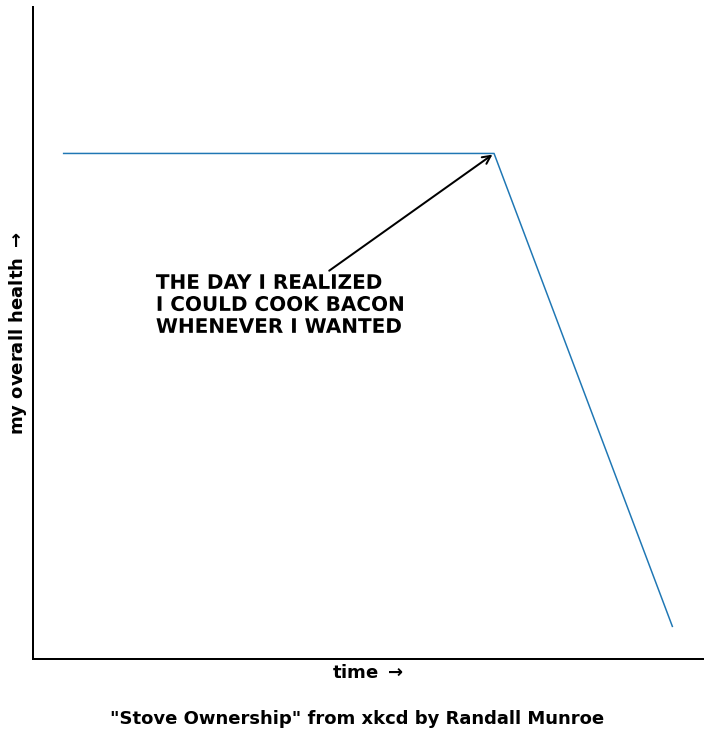

In [9]:
# with plt.xkcd():
#fig = plt.figure()
#ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

fig, ax = views.get_plot()

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

ax.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->', lw=2), xytext=(15, -10), size=20,
    path_effects=[patheffects.withStroke(linewidth=3, foreground="w")]
)

ax.plot(data)

ax.set_xlabel(r'time $\rightarrow$')
#ax.set_xlabel(r'$\rho/\rho_{ref}\;\rightarrow$', color='red')
ax.set_ylabel(r'my overall health $\rightarrow$')
fig.text(
    0.5,
    0.05,
    '"Stove Ownership" from xkcd by Randall Munroe',
    ha='center'
)

## Residual vs Predicted

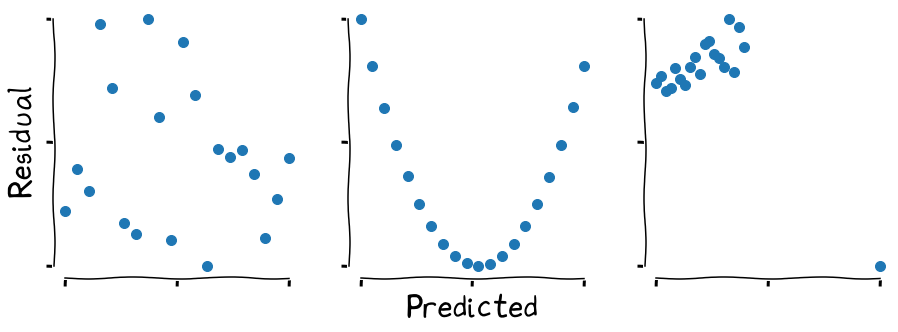

In [55]:
size = 5
n_ax = 3
marker_size = 100
label_size = 30

def _gen_ticks(axis):
    mi = min(axis)
    ma = max(axis)
    ticks = [mi, np.mean([mi, ma]), ma]
    return ticks


with plt.xkcd():
    fig, axs = plt.subplots(
        1, n_ax, sharey=False, sharex=False, figsize=(n_ax * size, size)
    )

x_axis = np.arange(-10, 10)

n_points = len(x_axis)

# A
mu, sigma = 0, 0.1 # mean and standard deviation
residuals_random = np.random.normal(mu, sigma, n_points)
axs[0].scatter(x_axis, residuals_random, s=marker_size)
axs[0].set_ylabel("Residual", fontsize=label_size)
axs[0].set_xticks(_gen_ticks(x_axis))
axs[0].set_yticks(_gen_ticks(residuals_random))

# B
mu, sigma = 0, 0.1 # mean and standard deviation
residuals_nonlinear = x_axis**2 + np.random.normal(mu, sigma, n_points)
axs[1].scatter(x_axis, residuals_nonlinear, s=marker_size)
axs[1].set_xlabel("Predicted", fontsize=label_size)
axs[1].set_xticks(_gen_ticks(x_axis))
axs[1].set_yticks(_gen_ticks(residuals_nonlinear))

# C
mu, sigma = 0, 0.1 # mean and standard deviation
residuals_nonlinear = np.random.normal(mu, sigma, n_points)
residuals_nonlinear[-1] = -1
x_axis_limit = x_axis/4
x_axis_limit[-1] = x_axis[-1]
axs[2].scatter(x_axis_limit, residuals_nonlinear, s=marker_size)
axs[2].set_xticks(_gen_ticks(x_axis_limit))
axs[2].set_yticks(_gen_ticks(residuals_nonlinear))

for ax in axs:
    views.fix_borders(ax)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formats.formatter_off))    ax.xaxis.set_major_formatter(ticker.FuncFormatter(formats.formatter_off))
    

Residual is error etc etc

## Data distribution

Explain residual

## Learning curves

In [13]:
from matplotlib_views import vapnik as vapnik_views

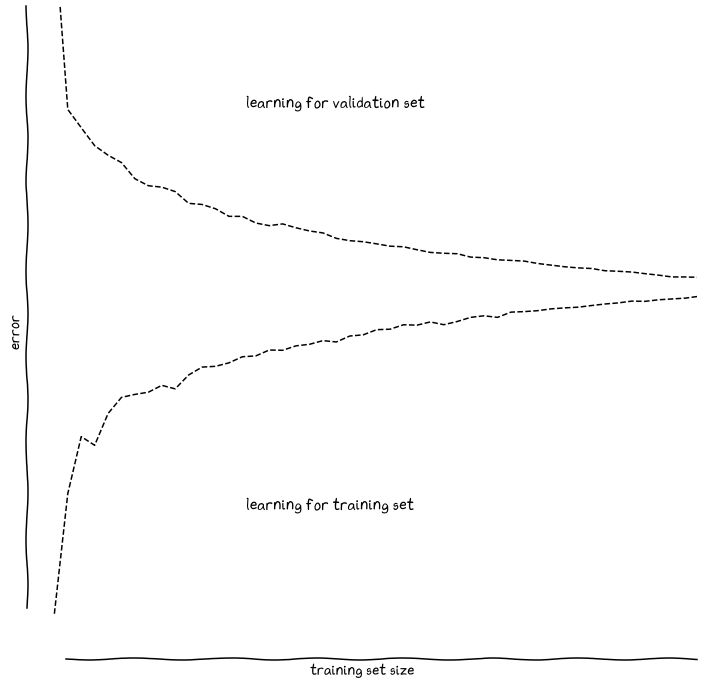

In [14]:
with plt.xkcd():
    fig, ax = views.get_plot()

mu, sigma = 0, 0.5

training_set_size = [2**x for x in range(1, 10)]
training_set_size = np.linspace(1, 512, 50)

training_set_size = np.array(training_set_size)
N = len(training_set_size)

error_training = training_set_size
error_validation = 1/training_set_size

s = np.random.normal(mu, sigma, N)
scale = 6.0/np.arange(1, N+1)
s *= scale
error_training = 5*np.log(error_training) + s

s = np.random.normal(mu, sigma, N)
scale = 6.0/np.arange(1, N+1)
s *= scale
error_validation = 5*np.log(error_validation) + 64 + s

ax.plot(training_set_size, error_training, "k--")
ax.plot(training_set_size, error_validation, "k--")

ax.set_ylabel("error")
ax.set_xlabel("training set size")

ykeys = [0, 30.0, 60]
xkeys = [10, 150, 300, 500]

vapnik_views.learning_curve_error(ax, xkeys, ykeys,
    x_range=(-20, 500),
    y_range=(-5, 60),
    loglog=False)

plt.xticks([])
plt.yticks([])

font = {"family": "xkcd", "fontsize":15}


txt_train = "Learning for training set".lower()
txt_valid = "Learning for validation set".lower()
ax.text(150, 50, txt_valid, **font)
ax.text(150, 10, txt_train, **font)

# ax.arrow(20, 10, 20, 0, head_width=2, head_length=4, head_starts_at_zero=True)

pass

blah blah blah learning curves

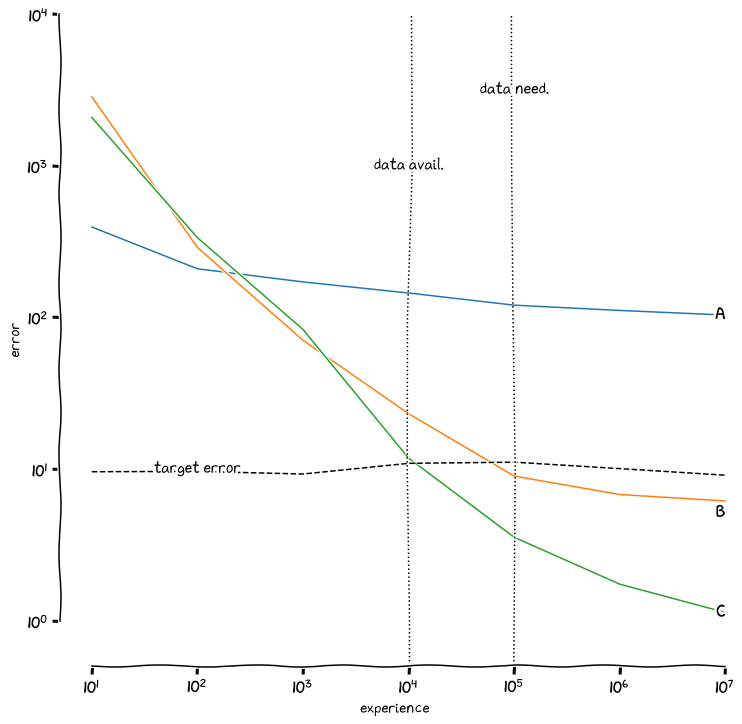

In [17]:
np.random.seed(999)

plt.rc('path', effects=[PathEffects.withStroke(linewidth=4, foreground="w")])

def get_error(N,a,b):
    error = a/N**b
    return error

def get_error_bad(N, a, b, offset, noise=0.2):
    error = a/N**b * (1-np.random.normal(0, noise, 1)) + offset
    return error

with plt.xkcd():
    fig, ax = views.get_plot()

mu, sigma = 0, 0.5

training_set_size = [10**x for x in range(1, 8)]
training_set_size = np.array(training_set_size)
N = len(training_set_size)

# error_training = 5/training_set_size
#
# s = np.random.normal(mu, sigma, N)
# scale = 6.0/np.arange(1, N+1)
# s *= scale
# error_training += 64 + s

offset = 10

error_training = [get_error_bad(x,600,0.3,100) for x in training_set_size]
error_training = np.array(error_training)
error_a = np.array([get_error_bad(x,10_000,0.7, 5.0) for x in training_set_size])
error_b = np.array([get_error_bad(x,10_000,0.7,1.0) for x in training_set_size])

ax.plot(training_set_size, error_training)
ax.plot(training_set_size, error_a+1.0)
ax.plot(training_set_size, error_b)

# Models End
model_names = ["A", "B", "C"]
end_points = []
end_points.append(error_training[-1])
end_points.append(error_a[-1])
end_points.append(error_b[-1])

for name, point in zip(model_names, end_points):

    font = {
        "family": "xkcd",
        "fontsize":15,
        "horizontalalignment": 'right',
        "verticalalignment": 'center',
    }
    txtobj = ax.text(10**7, point, name, **font)
    txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# lines

line_data = [10]*N
line_data = np.array(line_data) + np.random.normal(0,0.5,N)
lineobj = ax.plot(training_set_size, line_data, "k--")

yticks = [0.1, 1.0, 10, 100, 10**3, 10**4]
line_data_y = np.array(yticks)
line_data_x = np.array([10**4]*line_data_y.shape[0]) * (1- np.random.normal(0,0.05,line_data_y.shape[0]))
lineobj = ax.plot(line_data_x, line_data_y, "k", linestyle="dotted")

yticks = [0.1, 1.0, 10, 100, 10**3, 10**4]
line_data_y = np.array(yticks)
line_data_x = np.array([10**5]*line_data_y.shape[0]) * (1- np.random.normal(0,0.05,line_data_y.shape[0]))
lineobj = ax.plot(line_data_x, line_data_y, "k", linestyle="dotted")


lineobj[0].set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# text

font = {
    "family": "xkcd",
    "fontsize":15,
    "horizontalalignment": 'center',
    "verticalalignment": 'center',
}

txt_valid = "target error".lower()
txtobj = ax.text(10**2, 10**1, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt_valid = "data avail.".lower()
txtobj = ax.text(10**4, 10**3, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt_valid = "data need.".lower()
txtobj = ax.text(10**5, 10**3.5, txt_valid, **font)
txtobj.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])


# labels
ax.set_ylabel("error")
ax.set_xlabel("experience")

# ticks
yticks = [10**x for x in range(1, 8)]
plt.yticks(yticks)



ykeys = [1, 10.0, 100, 1000, 10**4]
xkeys = [10**x for x in range(1,8)]
# mpl_lc.learning_curve_error(ax, xkeys, ykeys)

# plt.xticks([])
# plt.yticks([])

font = {"family": "xkcd", "fontsize":15}


# txt_train = "Learning for training set".lower()
# txt_valid = "Learning for validation set".lower()
# ax.text(150, 50, txt_valid, **font)
# ax.text(150, 10, txt_train, **font)

# ax.arrow(20, 10, 20, 0, head_width=2, head_length=4, head_starts_at_zero=True)


ax.set_xscale('log')
ax.set_yscale('log')
ax.minorticks_off()

ax.set_xlim((5, max(xkeys)*(1+0.1)))
ax.set_ylim((5*10**-1, max(ykeys)))

border = [False, False, True, True]
spines = ax.spines.items()
for direction, spine in spines:
    if direction == "top":
        spine.set_visible(border[0])

    if direction == "right":
        spine.set_visible(border[1])

    if direction == "bottom":
        spine.set_visible(border[2])
        spine.set_bounds(min(xkeys), max(xkeys))

    if direction == "left":
        spine.set_visible(border[3])
        spine.set_bounds(min(ykeys), max(ykeys))

detail learning curve ex

## Data Distribution

Data distribution

For any model building, it is important to understand the structure of the underlying data. Typically, a normal or distribution (a) is resulting in more stable local models as sampling from such a set of observations leads to well behaved data sets for learning. Other distribution types often found in drug discovery analyzes such as skewed (b) or multimodal (c; e.g. bimodal often appear in solubility measurements) distributions overemphasize one type of observation and may lead to learning artifacts instead of actual relations in the data.

Apart from the distribution type, the actual width of the distribution is important. In order to model differences in the data, it is important to have a good spread of observed values. For activity data a spread of

image.png


image.png


image.png



Actual vs Predicted


Residuals vs Actual
result: np.ndarray = y_pred - y_true


Variance Explained

return 1 - np.var(residual(y_pred, y_true)) / var  # type: ignore

